# Loading data

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!cp /content/gdrive/Shareddrives/gdrive/datasets/thesis/MSFT-dataset/msft_df_scaled.parquet /content
!cp /content/gdrive/Shareddrives/gdrive/datasets/thesis/AMZN-dataset/amzn_df_scaled.parquet /content
!cp /content/gdrive/Shareddrives/gdrive/datasets/thesis/AAPL-dataset/aapl_df_scaled.parquet /content

!cp /content/gdrive/Shareddrives/gdrive/datasets/thesis/MSFT-dataset/msft_df.parquet /content
!cp /content/gdrive/Shareddrives/gdrive/datasets/thesis/AMZN-dataset/amzn_df.parquet /content
!cp /content/gdrive/Shareddrives/gdrive/datasets/thesis/AAPL-dataset/aapl_df.parquet /content

In [3]:
!cp /content/gdrive/Shareddrives/gdrive/datasets/thesis/AMZN-dataset/data-amzn.csv /content
!cp /content/gdrive/Shareddrives/gdrive/datasets/thesis/AMZN-dataset/data_dump_amzn.pickle /content

!cp /content/gdrive/Shareddrives/gdrive/datasets/thesis/AAPL-dataset/data-aapl.csv /content
!cp /content/gdrive/Shareddrives/gdrive/datasets/thesis/AAPL-dataset/data_dump_aapl.pickle /content

!cp /content/gdrive/Shareddrives/gdrive/datasets/thesis/MSFT-dataset/data-msft.csv /content
!cp /content/gdrive/Shareddrives/gdrive/datasets/thesis/MSFT-dataset/data_dump_msft.pickle /content

In [4]:
!pip install fastparquet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 49.6 MB/s eta 0:00:00


## Finance

In [5]:
import pandas as pd
import numpy as np

In [6]:
msft_df_scaled = pd.read_parquet('msft_df_scaled.parquet', engine='fastparquet')
amzn_df_scaled = pd.read_parquet('amzn_df_scaled.parquet', engine='fastparquet')
aapl_df_scaled = pd.read_parquet('aapl_df_scaled.parquet', engine='fastparquet')

msft_df_scaled['file-company'] = 'msft'
amzn_df_scaled['file-company'] = 'amzn'
aapl_df_scaled['file-company'] = 'aapl'

msft_df_scaled.rename(columns={'Date': 'file-date'}, inplace=True)
msft_df_scaled = msft_df_scaled[['file-date', 'file-company'] + [col for col in msft_df_scaled.columns if col not in ['file-date', 'file-company']]]

amzn_df_scaled.rename(columns={'Date': 'file-date'}, inplace=True)
amzn_df_scaled = amzn_df_scaled[['file-date', 'file-company'] + [col for col in amzn_df_scaled.columns if col not in ['file-date', 'file-company']]]

aapl_df_scaled.rename(columns={'Date': 'file-date'}, inplace=True)
aapl_df_scaled = aapl_df_scaled[['file-date', 'file-company'] + [col for col in aapl_df_scaled.columns if col not in ['file-date', 'file-company']]]

df_finances = pd.concat([msft_df_scaled, amzn_df_scaled, aapl_df_scaled])

del msft_df_scaled, amzn_df_scaled, aapl_df_scaled

df_finances.rename(columns={'file-date': 'date_str', 'file-company': 'ticker'}, inplace=True)

In [7]:
df_finances = df_finances.rename(columns={'2-week-change': '180-days-change'})
df_finances.iloc[:5, :11]

,date_str,ticker,Open,High,Low,Close,Volume,Dividends,Stock Splits,180-days-change,percent-change
index,,,,,,,,,,,
14,2022-01-24,msft,0.333551,0.345746,0.277082,0.362959,0.942170,0.0,0.0,275.135966,-5.289113
15,2022-01-25,msft,0.330453,0.336007,0.318355,0.327526,0.783569,0.0,0.0,275.073844,-2.724102
16,2022-01-26,msft,0.405473,0.398072,0.353926,0.364488,1.000000,0.0,0.0,274.781054,-5.519689
17,2022-01-27,msft,0.381195,0.392559,0.376102,0.378562,0.545138,0.0,0.0,274.407852,-6.632944
18,2022-01-28,msft,0.370127,0.397980,0.360353,0.416422,0.499124,0.0,0.0,274.102340,-9.284341


## Texts

In [8]:
company_tickers = ['msft', 'aapl', 'amzn']

df_texts = pd.DataFrame(columns=['file_name', 'date_str', 'text_id', 'title', 'content', 'ticker'])

for company_ticker in company_tickers:

    df = pd.read_csv(f'data-{company_ticker}.csv')
    df_texts = pd.concat([df_texts, df])

df_texts['combined_text'] = df_texts['title'] + '\n' + df_texts['content']

In [9]:
df_texts = df_texts[df_texts['content'].str.split().str.len() >= 30]

In [10]:
df = df_texts.merge(df_finances, how = 'inner', on = ['ticker', 'date_str'])
df.sort_values('date_str', inplace = True)
df.dropna(inplace=True)

del df_texts, df_finances
df

,file_name,date_str,text_id,title,content,ticker,combined_text,Open,High,Low,...,Dividends_prev_5d,Dividends_prev_6d,Dividends_prev_7d,Dividends_prev_8d,Dividends_prev_9d,Dividends_prev_10d,Dividends_prev_11d,Dividends_prev_12d,Dividends_prev_13d,Dividends_prev_14d
5166,"Gaming for everyone, everywhere: our view on t...",2022-09-01,CBMiUGh0dHBzOi8vYmxvZ3MubWljcm9zb2Z0LmNvbS9vbi...,"Gaming for everyone, everywhere: our view on t...",Game developers around the world are creating ...,msft,"Gaming for everyone, everywhere: our view on t...",0.189439,0.187181,0.191226,...,0.0,0.0,0.0,0.0,0.0,0.0,0.826667,0.0,0.0,0.0
20960,Deforestation spurs wave of fires in Brazilian...,2022-09-01,CBMiZmh0dHBzOi8vd3d3LmFsamF6ZWVyYS5jb20vbmV3cy...,Deforestation spurs wave of fires in Brazilian...,Deforestation spurs wave of fires in Brazilian...,amzn,Deforestation spurs wave of fires in Brazilian...,0.411742,0.419042,0.405746,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3728,Windows Memory Diagnostic Review (A Free RAM T...,2022-09-01,CBMiQWh0dHBzOi8vd3d3LmxpZmV3aXJlLmNvbS93aW5kb3...,Windows Memory Diagnostic Review (A Free RAM T...,Software & Apps > Windows Windows Memory Diagn...,msft,Windows Memory Diagnostic Review (A Free RAM T...,0.189439,0.187181,0.191226,...,0.0,0.0,0.0,0.0,0.0,0.0,0.826667,0.0,0.0,0.0
28685,Police at Amazon facility threaten to arrest u...,2022-09-01,CBMibWh0dHBzOi8vdGVjaGNydW5jaC5jb20vMjAyMi8wOS...,Police at Amazon facility threaten to arrest u...,Police at Amazon facility threaten to arrest u...,amzn,Police at Amazon facility threaten to arrest u...,0.411742,0.419042,0.405746,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
21684,Amazon Echo Show Guide | Alexa Tips & Tricks 2...,2022-09-01,CBMiVWh0dHBzOi8vd3d3LnBvcHVsYXJtZWNoYW5pY3MuY2...,Amazon Echo Show Guide | Alexa Tips & Tricks 2...,Amazon’s Echo Show is an Alexa smart speaker w...,amzn,Amazon Echo Show Guide | Alexa Tips & Tricks 2...,0.411742,0.419042,0.405746,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15207,Apple job postings grow in August as company e...,2023-09-29,CBMiowFodHRwczovL3RlbGVjb20uZWNvbm9taWN0aW1lcy...,Apple job postings grow in August as company e...,- Devices\n- 2 min read\nApple job postings gr...,aapl,Apple job postings grow in August as company e...,0.639304,0.630959,0.634330,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
19957,Jumbo-Visma To Be Backed by Amazon! Primož Ro...,2023-09-29,CBMihQFodHRwczovL3d3dy5iaWN5Y2xpbmcuY29tL3JhY2...,Jumbo-Visma To Be Backed by Amazon! Primož Rog...,Not long after riding the final stage of the V...,amzn,Jumbo-Visma To Be Backed by Amazon! Primož Rog...,0.432711,0.429673,0.431303,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
393,Mayo Clinic the first to leverage Microsoft 36...,2023-09-29,CBMiSmh0dHBzOi8vZXJwLnRvZGF5L21heW8tY2xpbmljLX...,Mayo Clinic the first to leverage Microsoft 36...,Mayo Clinic is one of the first healthcare org...,msft,Mayo Clinic the first to leverage Microsoft 36...,0.473459,0.472329,0.476438,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
7897,Upgrade to Windows 11 Pro and get Microsoft Of...,2023-09-29,CBMia2h0dHBzOi8vd3d3LnBjd29ybGQuY29tL2FydGljbG...,Upgrade to Windows 11 Pro and get Microsoft Of...,Everyone wants to run the best software and pr...,msft,Upgrade to Windows 11 Pro and get Microsoft Of...,0.473459,0.472329,0.476438,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


## Text to vector - create

In [ ]:
!pip install -U sentence-transformers

In [ ]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer("all-MiniLM-L6-v2", device="cuda")

# Our sentences we like to encode
sentences = [
    "This framework generates embeddings for each input sentence",
    "Sentences are passed as a list of strings.",
    "The quick brown fox jumps over the lazy dog.",
]

# Sentences are encoded by calling model.encode()
embeddings = model.encode(sentences)

# Print the embeddings
for sentence, embedding in zip(sentences, embeddings):
    print("Sentence:", sentence)
    print("Embedding:", embedding.shape)
    print("")

def get_text_vector(texts):
    return model.encode(texts)

In [ ]:
from tqdm import tqdm
from pathlib import Path
import pickle
import os

# Путь к файлу
col = 'title'
# col = 'content'

# file_path = 'sbert-output-all-MiniLM-L6-v2.parquet'
pickle_file = f'{col}_sbert-data-all-MiniLM-L6-v2.pkl'

# df['content'][:5].apply(get_text_vector)

# get_text_vector(df['content'][0])
# df

# Попробуем загрузить существующий файл
try:
    # existing_df = fastparquet.ParquetFile(file_path).to_pandas()
    # existing_df = pd.read_parquet(file_path, engine='fastparquet')
    with open(pickle_file, 'rb') as f:
        existing_data = pickle.load(f)
        existing_df = pd.DataFrame(existing_data)
except FileNotFoundError:
    existing_df = pd.DataFrame(columns = ['file_name', 'date_str', 'ticker'])


# Создаем пустой список для хранения данных
try:
    with open(pickle_file, 'rb') as f:
        data = pickle.load(f)
except FileNotFoundError:
    data = []

# Обрабатываем каждую строку исходного DataFrame
# for index, (row_index, row) in enumerate(df.iterrows()):
for index, row in tqdm(df.iterrows(), total=len(df), desc="Processing rows"):
    if existing_df[
        (existing_df['file_name'] == row['file_name'])
        & (existing_df['date_str'] == row['date_str'])
        & (existing_df['ticker'] == row['ticker'])
    ].shape[0] > 0:
        continue

    # print(index)
    text_vector = get_text_vector(row[col])
    new_row = {
        'file_name': row['file_name'],
        'date_str': row['date_str'],
        'ticker': row['ticker']
    }
    for i in range(384):
        new_row[f'{col}_vector_{i}'] = text_vector[i]
    data.append(new_row)

    # if Path(file_path).exists():
    #     new_df.to_parquet(file_path, engine='fastparquet', append=True)
    # else:
    #     new_df.to_parquet(file_path, engine='fastparquet')

    # with open(pickle_file, 'wb') as f:
    #     pickle.dump(data, f)

    # os.system(f'cp /content/{pickle_file} /content/gdrive/Shareddrives/gdrive/datasets/thesis')

# Создаем новый DataFrame из списка данных
# result_df = pd.DataFrame(data)

In [ ]:
pickle_file = f'{col}_sbert-data-all-MiniLM-L6-v2.pkl'

with open(pickle_file, 'wb') as f:
    pickle.dump(data, f)

os.system(f'cp /content/{pickle_file} /content/gdrive/Shareddrives/gdrive/datasets/thesis')

## Text to vector - load

In [11]:
!cp /content/gdrive/Shareddrives/gdrive/datasets/thesis/content_sbert-data-all-MiniLM-L6-v2.pkl /content/
!cp /content/gdrive/Shareddrives/gdrive/datasets/thesis/title_sbert-data-all-MiniLM-L6-v2.pkl /content/

In [12]:
import pickle

with open('/content/title_sbert-data-all-MiniLM-L6-v2.pkl', 'rb') as f:
    data = pickle.load(f)
    title_vector_df = pd.DataFrame(data)

title_vector_df.head()

,file_name,date_str,ticker,title_vector_0,title_vector_1,title_vector_2,title_vector_3,title_vector_4,title_vector_5,title_vector_6,...,title_vector_374,title_vector_375,title_vector_376,title_vector_377,title_vector_378,title_vector_379,title_vector_380,title_vector_381,title_vector_382,title_vector_383
0,Amazon Athena is now available in the AWS Asia...,2022-09-01,amzn,0.068509,-0.009772,-0.002334,-0.030721,0.021282,-0.007031,-0.082769,...,0.031173,0.025041,-0.026787,-0.061143,0.054979,0.149889,0.091376,-0.008672,-0.031967,0.068303
1,'Brazilians aren't familiar with the Amazon': ...,2022-09-01,amzn,-0.027183,-0.007784,-0.065850,0.005597,-0.030607,0.038106,0.032644,...,-0.005675,-0.060187,0.016359,-0.055878,0.039639,0.072831,0.075260,-0.097495,-0.028746,0.080974
2,You need to watch the most realistic sci-fi th...,2022-09-01,amzn,-0.055348,-0.112653,-0.043876,0.044408,0.024205,-0.047001,-0.076831,...,0.116635,0.026907,0.019466,0.019243,-0.113166,0.055530,0.143048,-0.027494,-0.065802,0.036933
3,Apple settles lawsuit over its App Store moder...,2022-09-01,aapl,-0.001542,0.110108,0.051685,-0.073123,0.021374,-0.039999,0.028892,...,-0.000735,-0.003882,0.001212,-0.037122,-0.037162,-0.003922,0.112518,-0.097991,0.079511,-0.001089
4,Apple settles lawsuit with developer over App ...,2022-09-01,aapl,-0.055383,0.100334,0.075868,-0.049079,0.001149,-0.040359,0.058085,...,0.027130,-0.016632,-0.017872,-0.081936,-0.024020,-0.020513,0.056966,-0.085634,0.078723,0.065681


In [13]:
import pickle

with open('/content/content_sbert-data-all-MiniLM-L6-v2.pkl', 'rb') as f:
    data = pickle.load(f)
    content_vector_df = pd.DataFrame(data)

content_vector_df.head()

,file_name,date_str,ticker,content_vector_0,content_vector_1,content_vector_2,content_vector_3,content_vector_4,content_vector_5,content_vector_6,...,content_vector_374,content_vector_375,content_vector_376,content_vector_377,content_vector_378,content_vector_379,content_vector_380,content_vector_381,content_vector_382,content_vector_383
0,Amazon Athena is now available in the AWS Asia...,2022-09-01,amzn,0.055126,-0.067173,-0.038121,-0.041723,0.023654,-0.004505,-0.039637,...,0.026777,0.009991,-0.002923,-0.076899,0.062378,0.139449,0.092063,0.013944,-0.051098,0.048000
1,'Brazilians aren't familiar with the Amazon': ...,2022-09-01,amzn,0.017322,-0.011924,-0.032348,-0.014489,0.107320,0.022759,0.061005,...,-0.017336,-0.010605,-0.004351,0.036248,0.007574,0.033128,-0.057801,-0.027574,-0.001256,-0.026029
2,You need to watch the most realistic sci-fi th...,2022-09-01,amzn,0.019280,-0.083441,-0.021105,0.020910,0.074892,0.028351,-0.091436,...,0.122361,0.119236,0.018156,0.001212,-0.051670,0.090254,0.070555,-0.016344,-0.082807,0.057593
3,Apple settles lawsuit over its App Store moder...,2022-09-01,aapl,-0.097424,0.058276,0.057777,-0.073691,0.025042,0.001823,0.081336,...,0.023844,-0.028435,0.025204,-0.079503,-0.000521,-0.021091,0.103622,-0.063401,0.073002,0.063240
4,Apple settles lawsuit with developer over App ...,2022-09-01,aapl,-0.037046,0.061139,0.053615,-0.086364,0.015782,0.013850,0.075622,...,0.020699,-0.022335,0.008803,-0.066335,0.019727,0.007976,0.072639,-0.059582,0.041336,0.068942


In [14]:
df.shape

(28972, 101)

In [15]:
df = df.merge(title_vector_df, on=['file_name', 'date_str', 'ticker'], how='inner')
df = df.merge(content_vector_df, on=['file_name', 'date_str', 'ticker'], how='inner')

In [16]:
df.shape

(28972, 869)

In [27]:
!cp -r /content/gdrive/Shareddrives/gdrive/datasets/thesis/results/results-tfidf /content/

# Modeling

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

from tqdm import tqdm_notebook

## Random Forest

In [20]:
y = df['change-category']

# Преобразование текстовых значений в числовые для целевой переменной
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [23]:
train_size = 0.8
val_size = 0.1
test_size = 0.1

# Определяем индексы для разделения
train_end = int(df.shape[0] * train_size)
val_end = train_end + int(df.shape[0] * val_size)

# Делим на обучающую, валидационную и тестовую выборки
X_train = df.iloc[:train_end, 17:]
X_val = df.iloc[train_end:val_end, 17:]
X_test = df.iloc[val_end:, 17:]

y_train = y_encoded[:train_end]
y_val = y_encoded[train_end:val_end]
y_test = y_encoded[val_end:]

# Количество запусков с разными random seed
n_runs = 15

# Список для хранения результатов
results = []

# Запускаем цикл для обучения с разными random seed
for i in tqdm_notebook(range(n_runs)):
    np.random.seed(i)
    random_seed = np.random.randint(0, 10000)  # Генерируем случайный seed

    # Инициализация RandomForestClassifier с текущим random seed
    rf_classifier = RandomForestClassifier(
        n_estimators=400,
        criterion='entropy',
        min_samples_split=23,
        min_samples_leaf=21,
        max_depth=16,
        random_state=random_seed,  # Используем новый random seed
        n_jobs=-1,
        # verbose=10
    )

    # Обучение модели
    rf_classifier.fit(X_train, y_train)

    # Предсказание на тестовом наборе
    y_pred = rf_classifier.predict(X_test)

    # Оценка точности модели
    accuracy = accuracy_score(y_test, y_pred)

    # Генерация отчета по классификации
    class_report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)  # Преобразуем в словарь для дальнейшего использования

    # Сохраняем результаты для текущего random seed
    results.append({
        'Model': 'RandomForestClassifier',
        'Random Seed': random_seed,
        'Accuracy': accuracy,
        'Precision (macro avg)': class_report['macro avg']['precision'],
        'Recall (macro avg)': class_report['macro avg']['recall'],
        'F1-Score (macro avg)': class_report['macro avg']['f1-score'],
        'Precision (weighted avg)': class_report['weighted avg']['precision'],
        'Recall (weighted avg)': class_report['weighted avg']['recall'],
        'F1-Score (weighted avg)': class_report['weighted avg']['f1-score'],
    })

# Преобразуем список результатов в DataFrame
df_results = pd.DataFrame(results)

# Сохраняем DataFrame в CSV файл
df_results.to_csv('results-sbert/rf_classifier_results_finance_news.csv', index=False)

<ipython-input-23-99e1dfc0593c>:25: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(n_runs)):


  0%|          | 0/15 [00:00<?, ?it/s]

In [24]:
df_results.iloc[:, 2:].agg(['min', 'max', 'median'])

,Accuracy,Precision (macro avg),Recall (macro avg),F1-Score (macro avg),Precision (weighted avg),Recall (weighted avg),F1-Score (weighted avg)
min,0.623188,0.361208,0.544564,0.321637,0.947555,0.623188,0.744371
max,0.650794,0.370994,0.554122,0.338323,0.948447,0.650794,0.764951
median,0.641822,0.365232,0.551016,0.328988,0.948049,0.641822,0.758239


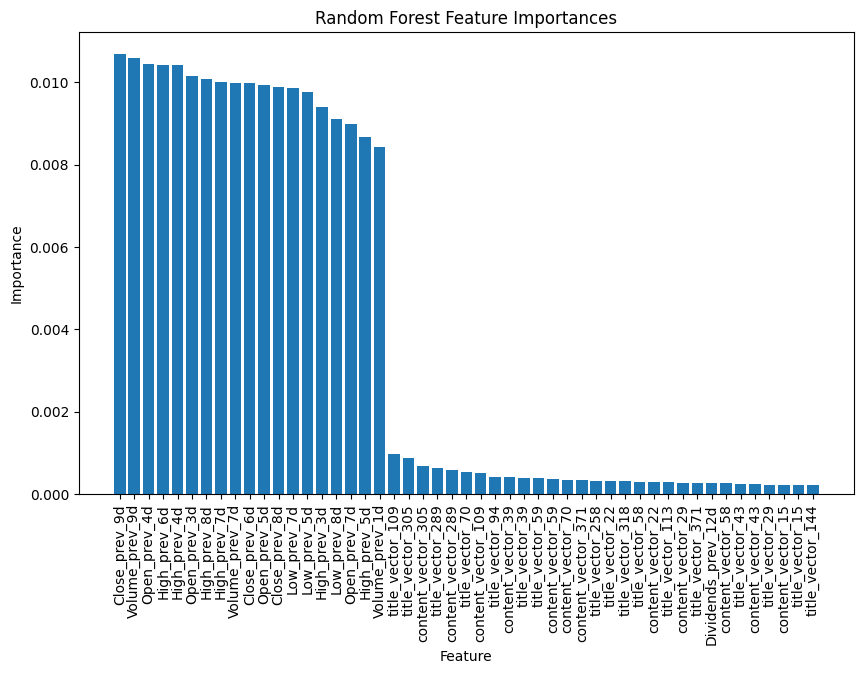

In [25]:
import matplotlib.pyplot as plt

# Assuming rf_classifier is your trained Random Forest classifier
feature_importances = rf_classifier.feature_importances_

# Get the names of the features
feature_names = X_train.columns  # Assuming df is your DataFrame with features

# Sort the features by their importances
sorted_indices = feature_importances.argsort()[::-1][51:100]
sorted_feature_importances = feature_importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Plotting the most important features
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_feature_importances)), sorted_feature_importances, tick_label=sorted_feature_names)
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Random Forest Feature Importances')
plt.show()

### Wilcoxon test

In [30]:
from scipy.stats import wilcoxon
import pandas as pd

df_results_with_news_sbert = pd.read_csv("/content/results-sbert/rf_classifier_results_finance_news.csv")
df_results_with_news_tfidf = pd.read_csv("/content/results-tfidf/rf_classifier_results_finance_news.csv")
df_results_without_news = pd.read_csv("/content/results-tfidf/lr_classifier_results_finance.csv")

# Например, сравним метрику accuracy
accuracy_with_news_sbert = df_results_with_news_sbert['Accuracy']
accuracy_with_news_tfidf = df_results_with_news_tfidf['Accuracy']
accuracy_without_news = df_results_without_news['Accuracy']

# Применяем Wilcoxon signed-rank test
stat, p_value = wilcoxon(accuracy_with_news_sbert, accuracy_without_news)

# Выводим результаты теста
print(f'Wilcoxon test statistic: {stat}')
print(f'P-value: {p_value}')

# Проверка на статистическую значимость
print("Compare with TF-IDF")
alpha = 0.05
if p_value < alpha:
    print('The difference between the models is statistically significant.')
else:
    print('The difference between the models is not statistically significant.')
print('================================')


# Применяем Wilcoxon signed-rank test
stat, p_value = wilcoxon(accuracy_with_news_sbert, accuracy_with_news_tfidf)

# Выводим результаты теста
print(f'Wilcoxon test statistic: {stat}')
print(f'P-value: {p_value}')

# Проверка на статистическую значимость
print("Compare with no news")
alpha = 0.05
if p_value < alpha:
    print('The difference between the models is statistically significant.')
else:
    print('The difference between the models is not statistically significant.')

Wilcoxon test statistic: 0.0
P-value: 6.103515625e-05
Compare with TF-IDF
The difference between the models is statistically significant.
Wilcoxon test statistic: 42.0
P-value: 0.33026123046875
Compare with no news
The difference between the models is not statistically significant.


## Logistic Regression

In [ ]:
train_size = 0.8
val_size = 0.1
test_size = 0.1

# Определяем индексы для разделения
train_end = int(df.shape[0] * train_size)
val_end = train_end + int(df.shape[0] * val_size)

# Делим на обучающую, валидационную и тестовую выборки
X_train = df.iloc[:train_end, 17:]
X_val = df.iloc[train_end:val_end, 17:]
X_test = df.iloc[val_end:, 17:]

y_train = y_encoded[:train_end]
y_val = y_encoded[train_end:val_end]
y_test = y_encoded[val_end:]

from sklearn.linear_model import LogisticRegression

# Количество запусков с разными random seed
n_runs = 15

# Список для хранения результатов
results = []

# Запускаем цикл для обучения с разными random seed
for i in tqdm_notebook(range(n_runs)):
    np.random.seed(i)
    random_seed = np.random.randint(0, 10000)  # Генерируем случайный seed

    # Инициализация LogisticRegression с текущим random seed
    lr_classifier = LogisticRegression(max_iter=1000, random_state=random_seed)

    # Обучение модели
    lr_classifier.fit(X_train, y_train)

    # Предсказание на тестовом наборе
    y_pred = lr_classifier.predict(X_test)

    # Оценка точности модели
    accuracy = accuracy_score(y_test, y_pred)

    # Генерация отчета по классификации
    class_report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)  # Преобразуем в словарь для дальнейшего использования

    # Сохраняем результаты для текущего random seed
    results.append({
        'Model': 'LogisticRegression',
        'Random Seed': random_seed,
        'Accuracy': accuracy,
        'Precision (macro avg)': class_report['macro avg']['precision'],
        'Recall (macro avg)': class_report['macro avg']['recall'],
        'F1-Score (macro avg)': class_report['macro avg']['f1-score'],
        'Precision (weighted avg)': class_report['weighted avg']['precision'],
        'Recall (weighted avg)': class_report['weighted avg']['recall'],
        'F1-Score (weighted avg)': class_report['weighted avg']['f1-score'],
    })

# Преобразуем список результатов в DataFrame
df_results = pd.DataFrame(results)

# Сохраняем DataFrame в CSV файл
df_results.to_csv('results/lr_classifier_results_finance_news.csv', index=False)

Accuracy: 0.69
Classification Report:
              precision    recall  f1-score   support

  -1% to +1%       0.13      0.17      0.15       332
         1%+       0.95      0.71      0.81      5077
        <-1%       0.21      0.81      0.33       401

    accuracy                           0.69      5810
   macro avg       0.43      0.56      0.43      5810
weighted avg       0.85      0.69      0.74      5810



[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:  1.7min
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:  1.7min


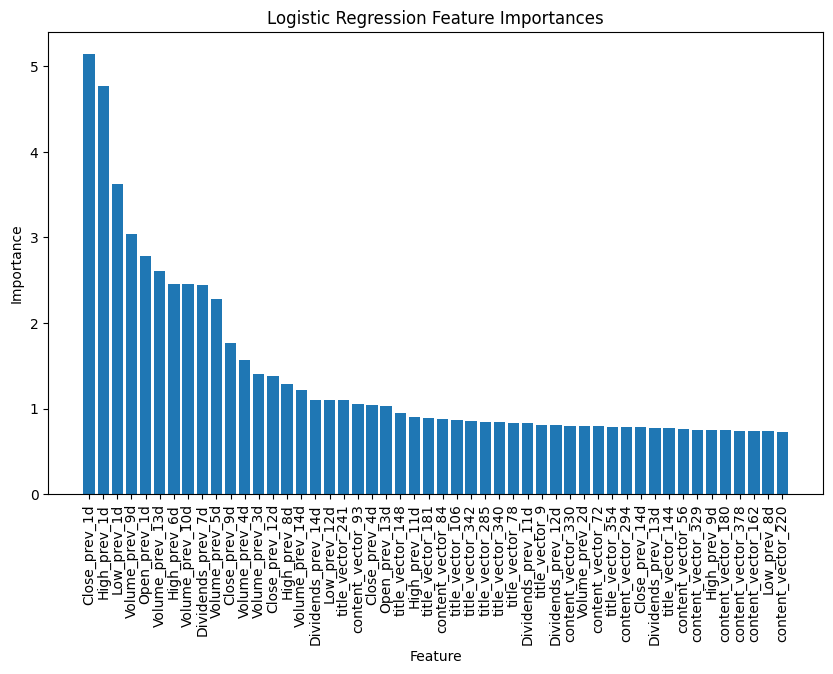

In [ ]:
import matplotlib.pyplot as plt

# Assuming lr_classifier is your trained Logistic Regression classifier
feature_importances = lr_classifier.coef_[0]

# Get the names of the features
feature_names = X_train.columns  # Assuming X_train is your training data

# Sort the features by their importances
sorted_indices = feature_importances.argsort()[::-1][:50]
sorted_feature_importances = feature_importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Plotting the most important features
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_feature_importances)), sorted_feature_importances, tick_label=sorted_feature_names)
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Logistic Regression Feature Importances')
plt.show()

## Catboost classifier

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 13.0 MB/s eta 0:00:00


In [ ]:
y = df['change-category']

# Преобразование текстовых значений в числовые для целевой переменной
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Разделение данных на тренировочный и тестовый наборы
# X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=11)

train_size = 0.8
X_train = df.iloc[:int(df.shape[0]*train_size), 17:]
X_test = df.iloc[int(df.shape[0]*train_size):, 17:]
y_train = y_encoded[:int(df.shape[0]*train_size)]
y_test = y_encoded[int(df.shape[0]*train_size):]


from catboost import CatBoostClassifier

# Инициализация CatBoostClassifier
cb_classifier = CatBoostClassifier(
                    iterations=100,
                    use_best_model = False,
                    depth=3,
                    learning_rate=0.007,
                    loss_function='MultiClass',
                    eval_metric='Accuracy',
                    random_seed=11,
                    colsample_bylevel = int(np.sqrt(X_train.shape[1])) / X_train.shape[1],
                    verbose=10)

# Обучение модели
cb_classifier.fit(X_train, y_train, eval_set=(X_test, y_test))

# Предсказание на тестовом наборе
y_pred = cb_classifier.predict(X_test)

# Оценка точности модели
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Вывод отчета по классификации
class_report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
print(f'Classification Report:\n{class_report}')

0:	learn: 0.8061282	test: 0.8738382	best: 0.8738382 (0)	total: 99.8ms	remaining: 9.88s
10:	learn: 0.8245040	test: 0.8564544	best: 0.8975904 (2)	total: 713ms	remaining: 5.77s
20:	learn: 0.8245040	test: 0.8578313	best: 0.8975904 (2)	total: 1.33s	remaining: 4.99s
30:	learn: 0.8245040	test: 0.8657487	best: 0.8975904 (2)	total: 2.05s	remaining: 4.57s
40:	learn: 0.8245040	test: 0.8364888	best: 0.8975904 (2)	total: 2.75s	remaining: 3.95s
50:	learn: 0.8245040	test: 0.8364888	best: 0.8975904 (2)	total: 3.24s	remaining: 3.11s
60:	learn: 0.8245040	test: 0.8358003	best: 0.8975904 (2)	total: 3.64s	remaining: 2.33s
70:	learn: 0.8245040	test: 0.8364888	best: 0.8975904 (2)	total: 4.04s	remaining: 1.65s
80:	learn: 0.8245040	test: 0.8363167	best: 0.8975904 (2)	total: 4.43s	remaining: 1.04s
90:	learn: 0.8245040	test: 0.8364888	best: 0.8975904 (2)	total: 4.88s	remaining: 483ms
99:	learn: 0.8245040	test: 0.8364888	best: 0.8975904 (2)	total: 5.2s	remaining: 0us

bestTest = 0.8975903614
bestIteration = 2

Ac

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


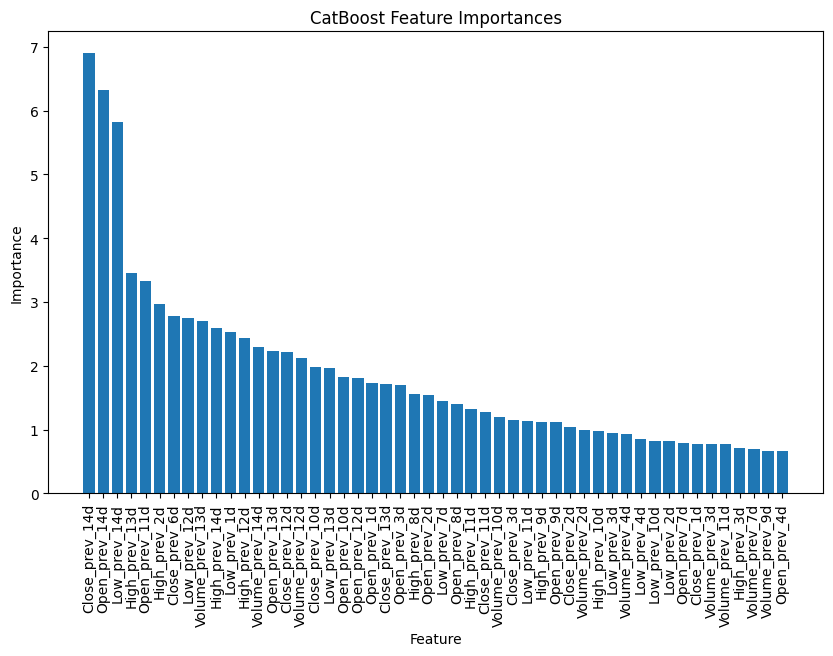

In [ ]:
import matplotlib.pyplot as plt

# Assuming cb_classifier is your trained CatBoost classifier
feature_importances = cb_classifier.get_feature_importance()

# Get the names of the features
feature_names = X_train.columns  # Assuming X_train is your training data

# Sort the features by their importances
sorted_indices = feature_importances.argsort()[::-1][:50]
sorted_feature_importances = feature_importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Plotting the most important features
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_feature_importances)), sorted_feature_importances, tick_label=sorted_feature_names)
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('CatBoost Feature Importances')
plt.show()

In [ ]:
## add MLP with sbert
## add metrics for MLP
## add references